Will Try the above program later as it is giving error.

In [ ]:
import numpy as np
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Example training data, of dtype `string`.
training_data = np.array([["This is the 1st sample."], ["And here's the 2nd sample."]])

# Create a TextVectorization layer instance. It can be configured to either
# return integer token indices, or a dense token representation (e.g. multi-hot
# or TF-IDF). The text standardization and text splitting algorithms are fully
# configurable.
vectorizer = TextVectorization(output_mode="binary")

# Calling `adapt` on an array or dataset makes the layer generate a vocabulary
# index for the data, which can then be reused when seeing new data.
vectorizer.adapt(training_data)

# After calling adapt, the layer is able to encode any n-gram it has seen before
# in the `adapt()` data. Unknown n-grams are encoded via an "out-of-vocabulary"
# token.
integer_data = vectorizer(training_data)
print(integer_data)

In [136]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

In [137]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)

y=np.array([[0],[0],[0],[1]], dtype=np.float32)
y_binary = to_categorical(y)


model=Sequential()
model.add(Dense(32, input_dim = X.shape[1]))
model.add(Activation('softmax'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 32)                96        
_________________________________________________________________
activation_59 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 2)                 66        
_________________________________________________________________
activation_60 (Activation)   (None, 2)                 0         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [138]:
y_binary

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

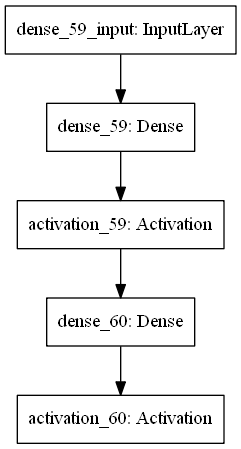

In [139]:
keras.utils.plot_model(model,'My_first_model_graph.png')

In [140]:
model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=["accuracy"])
#metrics = [keras.metrics.SparseCategoricalCrossentropy(name='acc')])

In [141]:
model.fit(X,y_binary,epochs=10, verbose=0)

In [142]:
lss, acc = model.evaluate(X,y_binary)
print('loss: ',lss , ' \naccuracy: ', acc)

4/4 [==============================] - 0s 15ms/step
loss:  0.684362530708313  
accuracy:  0.75


In [144]:
pr=model.predict_proba(X)

In [145]:
pr.sum(axis=1)

array([0.9688876 , 0.96371853, 0.9731409 , 0.9684212 ], dtype=float32)

In [162]:
# XOR
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
#tf.python.control_flow_ops = tf

# Set random seed
np.random.seed(42)

# Our data
X = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('float32')
y = np.array([[0],[1],[1],[0]]).astype('float32')

# Initial Setup for Keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten

# One-hot encoding the output
y2 = np_utils.to_categorical(y)
print(y2)

# Building the model
xor = Sequential()
xor.add(Dense(32, input_dim=2))
xor.add(Activation("relu"))
xor.add(Dense(2))
xor.add(Activation("softmax"))

xor.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

# Uncomment this line to print the model architecture
xor.summary()

# Fitting the model
history = xor.fit(X, y2, nb_epoch=5000, verbose=0)
print('history of data')
#print(history)
#print(history.history)

# Scoring the model
score = xor.evaluate(X, y2)
print('score is: ',score)
print("\nAccuracy: ", score[-1])

# Checking the predictions
print("\nPredictions:")
p=xor.predict(X)
print(xor.predict_proba(X))

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 32)                96        
_________________________________________________________________
activation_77 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_78 (Dense)             (None, 2)                 66        
_________________________________________________________________
activation_78 (Activation)   (None, 2)                 0         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


C:\Users\ayush.saxena\AppData\Local\conda\conda\envs\tensorlow_env\lib\site-packages\ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


history of data
4/4 [==============================] - 0s 14ms/step
score is:  [0.0001523672544863075, 1.0]

Accuracy:  1.0

Predictions:
[[9.9979860e-01 2.0139091e-04]
 [1.2860818e-04 9.9987137e-01]
 [1.4251715e-04 9.9985743e-01]
 [9.9986315e-01 1.3679363e-04]]


In [163]:
p.sum(axis=1).round(2)

array([1., 1., 1., 1.], dtype=float32)

In [152]:
new_x=np.array([[0,1]])
p=xor.predict(new_x)
print(xor.predict_proba(new_x))

[[0.49464923 0.49840495]]


In [153]:
p

array([[0.49464923, 0.49840495]], dtype=float32)